# Bitcoin Close Price Prediction

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('bitcoin.csv')

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [23]:
df.drop('Date', axis=1, inplace=True)

In [24]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(2713, 6)

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## Data Visualization

<Axes: xlabel='High', ylabel='Low'>

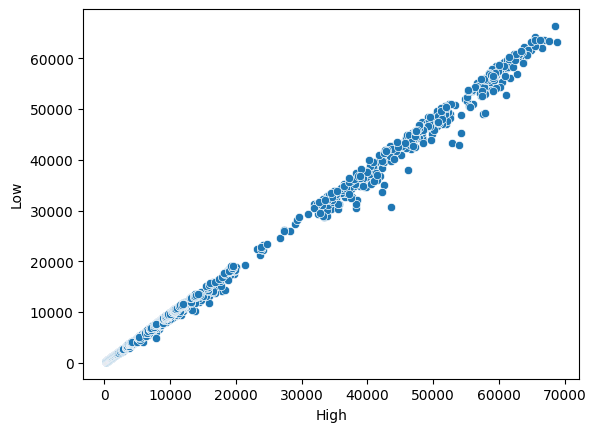

In [42]:
import seaborn as sns
sns.scatterplot(df, x=df['High'], y=df['Low'])

<Axes: xlabel='Volume', ylabel='Low'>

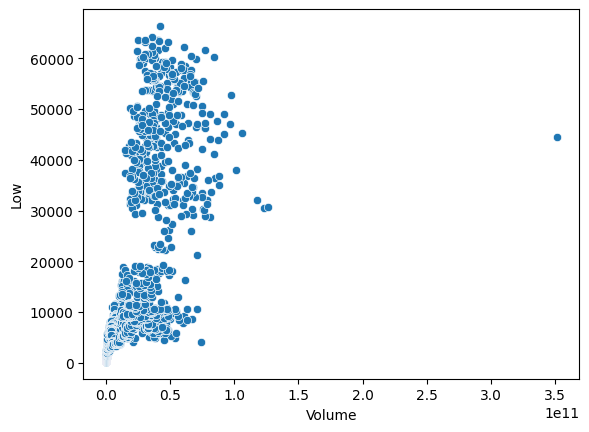

In [43]:
sns.scatterplot(df, x=df['Volume'], y=df['Low'])

## Splitting the Dataset

In [28]:
X = df.drop('Close', axis=1)
y = df['Close']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
#Scaling the train and test datasets so that the neural networks can train them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled.shape

(2170, 5)

## Training the model using Neural Networks(4 hidden layers are there)

In [32]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam' , loss='mean_squared_logarithmic_error')

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 57.3231 - val_loss: 20.6463
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.2940 - val_loss: 8.3429
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3340 - val_loss: 4.9745
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8288 - val_loss: 3.5779
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3916 - val_loss: 2.8672
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7599 - val_loss: 2.4052
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3187 - val_loss: 2.0471
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0105 - val_loss: 1.7153
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6459 - val_loss: 1.3866
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2990 - val_loss: 1.0445
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9519 - val_loss: 0.7165
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

## Model Evaluation

In [34]:
min_values = {}
for key, value in history.history.items():
    min_values[key] = min(value)

print(min_values)

{'loss': 0.0006041395827196538, 'val_loss': 0.0004446546081453562}


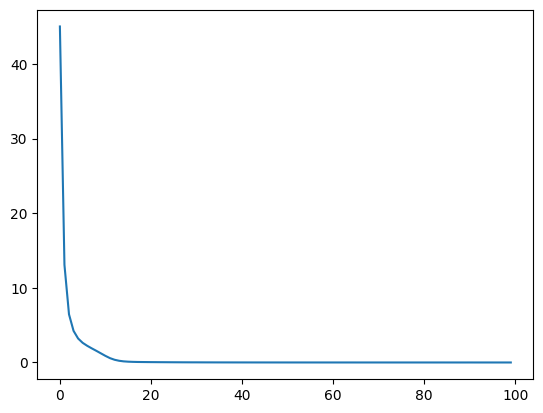

In [35]:
plt.plot(history.history['loss'])

In [36]:
y_pred = model.predict(X_test_scaled)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
y_test = np.array(y_test).flatten()  # Ensure y_test is a 1D array
y_pred = np.array(y_pred).flatten()  # Ensure y_pred is a 1D array

In [39]:
df_pred = pd.DataFrame({'test_actual': y_test, 'test_pred': y_pred})

# Display the first few rows of the DataFrame
print(df_pred.head())

    test_actual     test_pred
0   6652.229980   6598.005859
1    233.345001    244.192444
2  10159.960938  10235.413086
3   9677.113281   9587.726562
4  16477.599609  17089.683594


<Axes: >

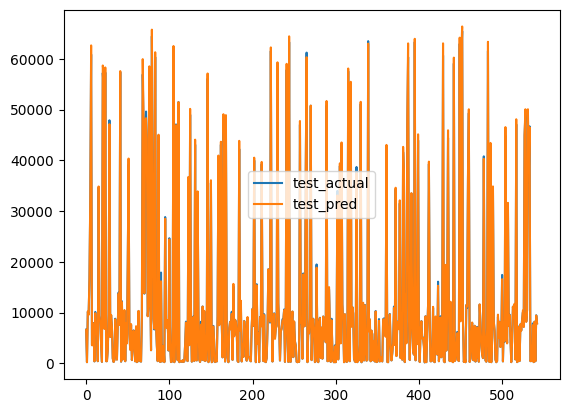

In [40]:
df_pred.plot(legend=True)